# SVM

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('../datasets/classification.csv')
df

,x,y,z
0,96.124134,310.337224,a
1,128.324703,308.678155,a
2,136.728437,291.937272,a
3,45.559958,322.518558,a
4,81.439313,272.916724,a
...,...,...,...
1025,297.326609,1.635536,b
1026,304.624932,83.091916,b
1027,357.694355,69.134697,b
1028,257.362030,40.277965,b


<Axes: xlabel='x', ylabel='y'>

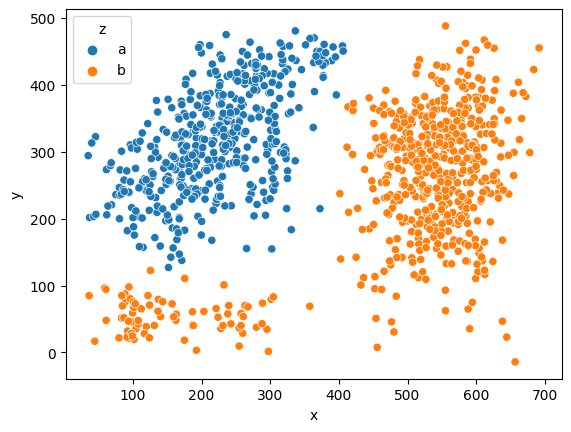

In [3]:
sns.scatterplot(x= 'x', y='y',hue='z', data=df)

<Axes: xlabel='z', ylabel='count'>

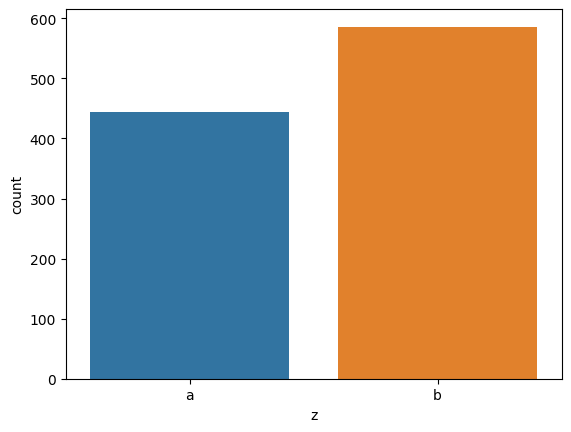

In [4]:
sns.countplot(x='z', data=df)

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

              precision    recall  f1-score   support

           a       1.00      0.99      1.00       108
           b       0.99      1.00      1.00       150

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



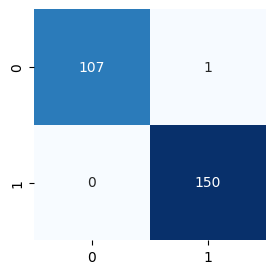

In [7]:
X, y = df.drop('z', axis = 1), df['z']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
clf = SVC() #rbf kernel
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
cf = confusion_matrix(ytest, ypred)
fig,ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf,annot=True,cbar=False,cmap='Blues',fmt='d',ax=ax)
print(classification_report(ytest,ypred))

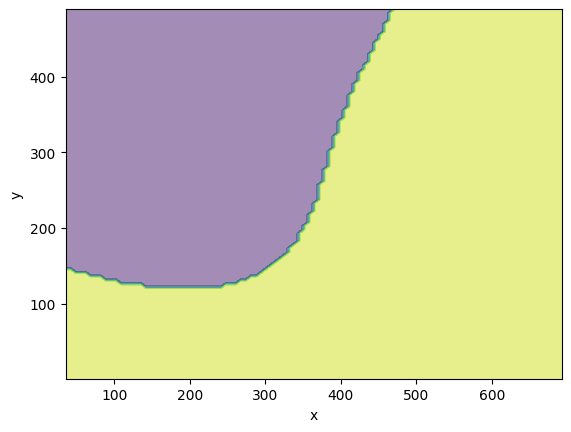

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clf,
    Xtrain,
    response_method='predict',
    xlabel='x',
    ylabel='y',
    alpha=0.5,
)

              precision    recall  f1-score   support

           a       0.97      0.94      0.95       112
           b       0.95      0.98      0.97       146

    accuracy                           0.96       258
   macro avg       0.96      0.96      0.96       258
weighted avg       0.96      0.96      0.96       258



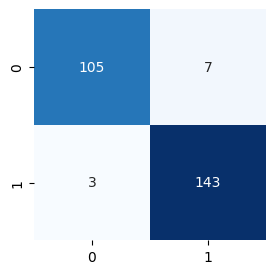

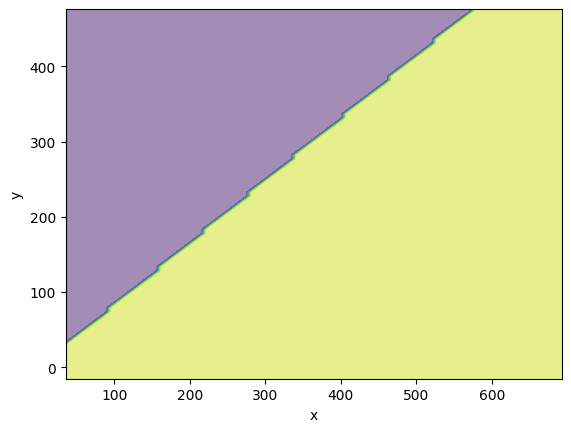

In [9]:
X, y = df.drop('z',axis=1), df['z']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
clf = SVC(kernel='linear') 
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)
cf = confusion_matrix(ytest,ypred)
fig,ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf,annot=True,cbar=False,cmap='Blues',fmt='d',ax=ax)
print(classification_report(ytest,ypred))
DecisionBoundaryDisplay.from_estimator(
    clf,
    Xtrain,
    response_method='predict',
    xlabel='x',
    ylabel='y',
    alpha=0.5,
)
plt.show()